In [31]:
import pandas as pd
from sklearn.datasets import load_boston, load_breast_cancer

# データセットのロード
boston = load_boston()
breast_cancer = load_breast_cancer()

# データフレームの作成
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target

breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['TARGET'] = breast_cancer.target

# CSVファイルとして保存
boston_df.to_csv('boston.csv', index=False)
breast_cancer_df.to_csv('breast_cancer.csv', index=False)

print('Files saved!')
# このプログラムは、BostonデータセットとBreast Cancerデータセットをそれぞれboston.csvおよびbreast_cancer.csvとしてカレントディレクトリに保存します。データセットはsklearn.datasetsからロードされ、pandasのデータフレームに変換されます。その後、データフレームはCSVファイルとして保存されます。







Files saved!


/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

データの確認

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv('boston.csv')
# test = pd.read_csv('output_test.csv')

# データサイズの確認
print(f'Train shape: {train.shape}')# Test shape: {test.shape}')

# 先頭行の出力
train.head()
# test.head()

Train shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


統計量の確認

In [33]:
train.describe(include='all')
# test.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


相関関係の確認

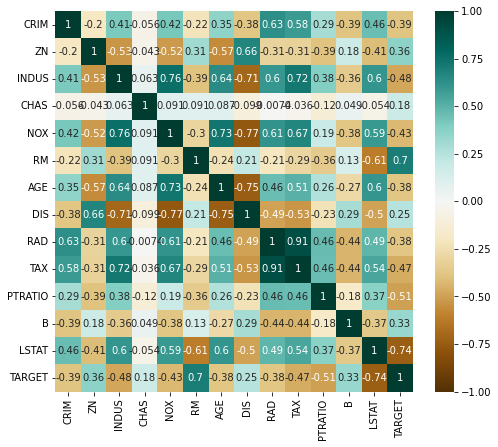

In [34]:
#変数間の相関関係のヒートマップ
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

# #カテゴリ変数とラベルの関係
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
# for feature_name in categorical_feature:
#     fig = plt.figure(figsize=(30,5))
#     plt.xticks(rotation=45, ha="right")
#     ax = sns.countplot(x=feature_name, hue='>50K, <=50K.', data=train)
plt.show()

欠損値とクラスの関係（欠損値がある場合はP.94参照）

In [35]:
print(f'Null of Train: {(train.isnull().sum())}')
# print(f'Null of Test: {(test.isnull().sum())}')

Null of Train: CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64


前処理

In [36]:
from sklearn.preprocessing import OrdinalEncoder

# # カテゴリカル変数の定義
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

# # 特徴量エンジニアリング
# train = train.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定
# test = test.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定

df = train
oe = OrdinalEncoder()
# df[categorical_feature] = oe.fit_transform(df[categorical_feature]).astype(int)

# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K': 0, ' >50K': 1})
# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K.': 0, ' >50K.': 1})


# df = df.rename(columns={'TARGET': 'target'})

df = df.rename(columns={'TARGET': 'target'})
df_without_target = df.drop(columns=['target'])

#標準化した場合
from sklearn import preprocessing
df_without_target = pd.DataFrame(preprocessing.scale(df_without_target), columns=df_without_target.columns)
df_without_target['target'] = df['target']

# データの正規化
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_without_target['target'] = scaler.fit_transform(df_without_target[['target']])
df = df_without_target

df.to_csv('boston.csv', index=False)
# train = df[df['Survived'].notnull()]#ラベルに欠損値がある場合
# test = df[df['Survived'].notnull()].drop(columns=['Survived'])#ラベルに欠損値がある場合